<a href="https://colab.research.google.com/github/AkbarBunyad/Training_Programs/blob/main/gi_group_ds/Evaluation/Yorkhub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Foundations Project: YorkHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company YorkHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset overview

### Question 1: Write the code to check the shape of the dataset and write your observations based on that

In [8]:
df=pd.read_csv('Yorkhub_order.csv')

In [9]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [10]:
data_shape = df.shape
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns")

rows_count=df.shape[0]
columns_count=df.shape[1]
print("Count of rows: ", rows_count)
print("Count of columns: ", columns_count)
print("Size of the Dataset:", df.size)

The dataset has 1898 rows and 9 columns
Count of rows:  1898
Count of columns:  9
Size of the Dataset: 17082




*   With less than 2000 rows, which is a bit low, we need to be cautious on handling missing values; in case of discarding those rows, the dataset will be reduced, leading to skewness.
*   Due to the presence of 9 features being a little bit small in size, business assumptions we make at the end can provide a relatively narrow scope


*   Given the dataset's size and feature count, analysis should be viewed with the mindset that it provides a snapshot rather than the wide view. E.g seasons and the rating per each feature (overall delivery time, food quality) could be given.







### Question 2: Write the observations based on the below output from the info() method.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




*   At first glance, all 1898 rows are complete across 9 columns without the presence of missing values, which is a good indication of having no need for imputation.
*   Rating is of object type, which should be numeric, however, in that case it means they may be inputs in string for that column.


*   Cost of the order column is highly likely to provide insights into pricing strategies in case of understanding its distribution thoroughly. E.g customers preferring American cuisine orders more from 15 - 20 range, which is why specialized campaigns can be considered for that sphere of people.





### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same.

In [7]:
df['restaurant_name']=df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB




*   The first thing noticed turned out to be decrease in memory usage from over 133KB to 102.7KB, from whose perspective operations such as groupby, merging, sorting and so on can be executed faster as opposed to those involving object types.
*  Overall, with 'category' data type, we can optimize our DataFrame for better memory usage and performance.

### Question 4: Write the code to find the summary statistics and write your observations based on that.

In [12]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000




*   Order_ID and Customer_ID are identifiers, and there is no logical sense of analyzing their descriptive statistics.
*   Food_preparation_time has a mean of 20 mins, 25th perc at 23 mins, mean at 27 mins with 4.63 mins deviation, meaning which there is not that much of variability, indicating consistent prepation times.


*   Both time variables have low std.deviations relative to their means, while cost_of_the_order indicates a bit abnormal price points, opening up opportunity for new pricing strategies based on cuisine types.





### Question 5: How many orders are not rated?

In [13]:
unrated_cnt = len(df[df['rating'] == 'Not given'])

total_cnt = len(df)

perc = (unrated_cnt / total_cnt) * 100

print(f"Dataset has {unrated_cnt}, orders are not rated, which is equal to {perc:.2f}%")

Dataset has 736, orders are not rated, which is equal to 38.78%


Decided to work on the assumption that may there be any pattern in giving no rating, being biased to some restaurants, or more specifically to their cuisines?

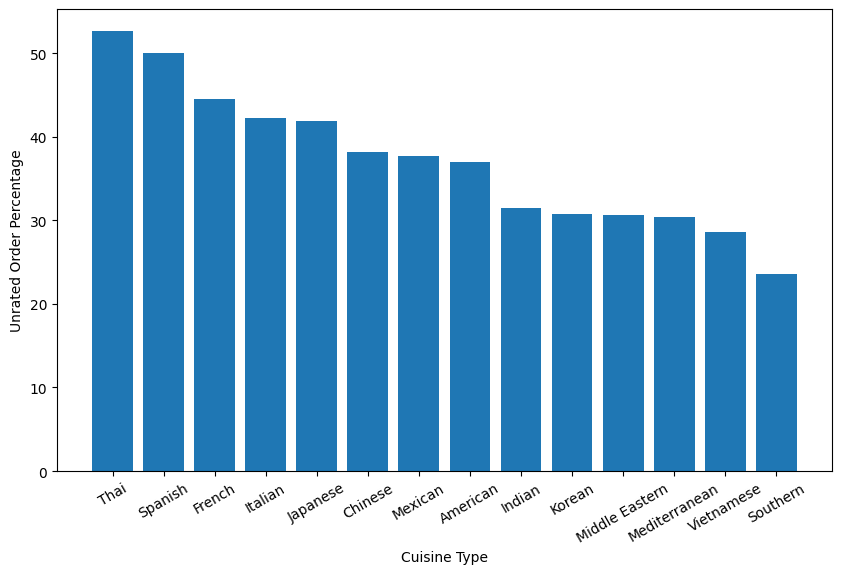

In [14]:
#distribution of unrated orders by restaurants

unrated_by_rest = df[df['rating'] == 'Not given'].groupby('restaurant_name')['rating'].count()
total_rest = df.groupby('restaurant_name')['rating'].count()
perc_unrated_by_rest = unrated_by_rest / total_rest * 100
perc_unrated_by_rest = perc_unrated_by_rest.sort_values(ascending = False)

#distribution along cuisines

unrated_by_cuis = df[df['rating'] == 'Not given'].groupby('cuisine_type')['rating'].count()
total_cuis = df.groupby('cuisine_type')['rating'].count()
perc_unrated_by_cuis = unrated_by_cuis / total_cuis * 100
perc_unrated_by_cuis = perc_unrated_by_cuis.sort_values(ascending = False)

#barchart for cuisine distribution

plt.figure(figsize = (10, 6))
plt.xlabel('Cuisine Type')
plt.ylabel('Unrated Order Percentage')
plt.bar(perc_unrated_by_cuis.index, perc_unrated_by_cuis.values)
plt.xticks(rotation = 30)
plt.show()

Did not get any worth taking insights from restaurants as there are 178 of them, while visualizing it shows non - usable features, however cuisine one can be used further.

Wanted to show disparity between rated and unrated order counts for cuisine distribution.

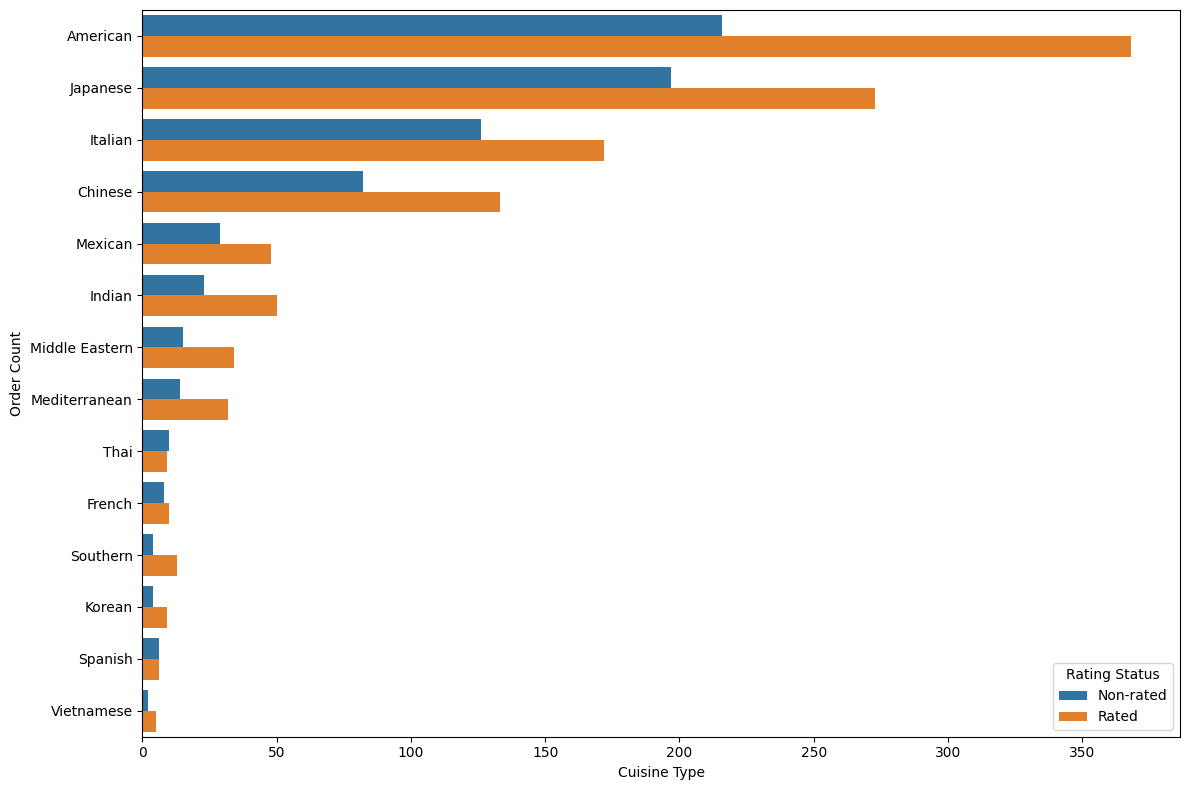

In [15]:
df['rating_status'] = df['rating'].apply(lambda x: 'Rated' if x!= 'Not given'
    else 'Non-rated')

order_cnt = df.groupby('cuisine_type')['order_id'].count().reset_index()
order_cnt.rename(columns = {'order_id': 'total_orders'}, inplace = True)
order_cnt.sort_values(by = 'total_orders', ascending = False, inplace = True)


plt.figure(figsize = (12, 8))
sns.countplot(df, y = 'cuisine_type', hue = 'rating_status', orient = 'h', order = order_cnt['cuisine_type'])
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.legend(title = 'Rating Status')
#plt.xticks(rotation = 38)
plt.tight_layout()
plt.show()

Based on two graphs:



*   In general, with about more than 700 non - rated ratings, the rating process on the app itself may be a little bit hard to navigate for some users, so it would be a better approach to make a simplified version of it removing verbal feedback option if appeared and implementing simple and time - saving versions like star rating or thumbs up/down option.
*   Although American and Japanese cuisine types are predominant in the count of total orders, however there is a high proportion of customers giving no rating at the end, leading to skewed results for restaurant ranking in the long term. To ensure both customer engagement and fair rivalry, reminders like 'rate your order/experience' need to be sent to those after order completion.


*   Customers belonging to Thai and French segments stand out to be an expanding market with their middle level rankings in order counts, however they are top - tiers in the unrated order distribution by percentage table. So, in order to gain this branch of people, some specialized discount strategy in delivery fee can be established.




## *Exploratory Data Analysis (EDA)*

### Univariate Analysis

### Question 6: Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

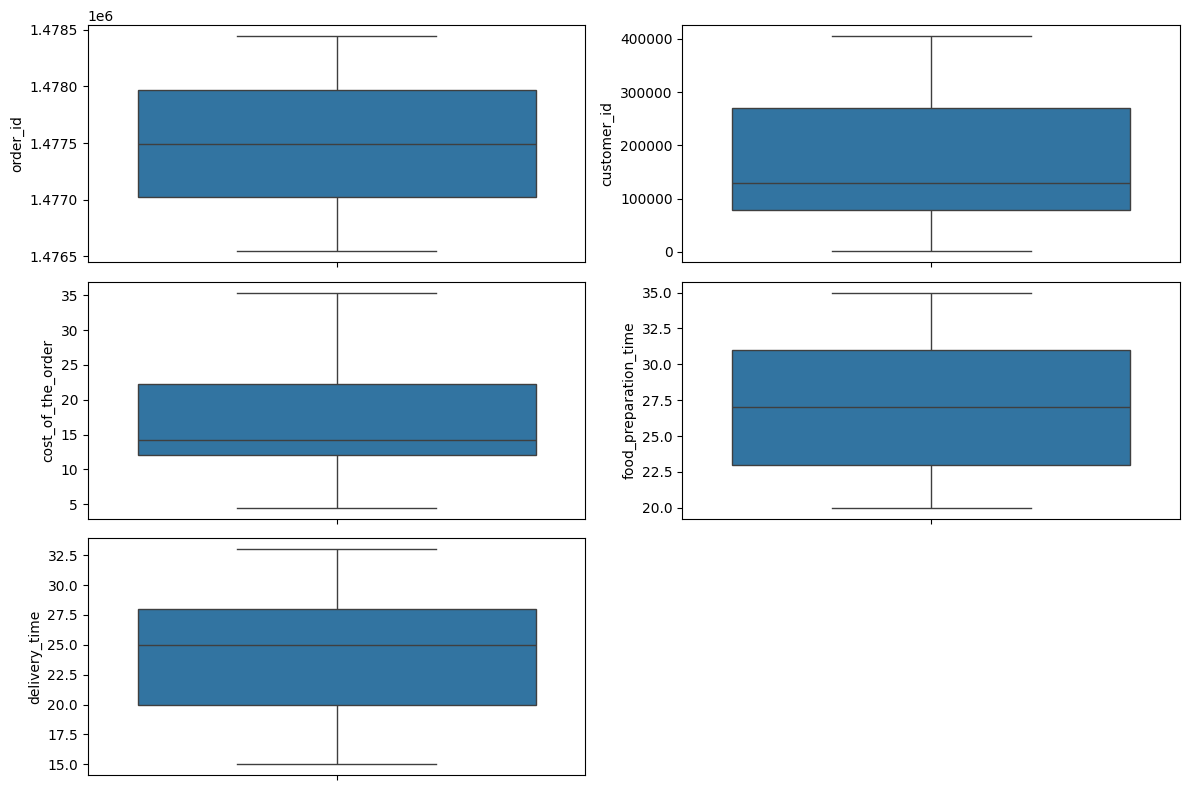

In [16]:
df_numeric = df.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize = (12, 8))
for i in range(len(df_numeric.columns)):
  plt.subplot(3, 2, i+1)
  #sns.violinplot(x = df_numeric[df_numeric.columns[i]])
  sns.boxplot(df_numeric[df_numeric.columns[i]])
  plt.tight_layout()
plt.show()

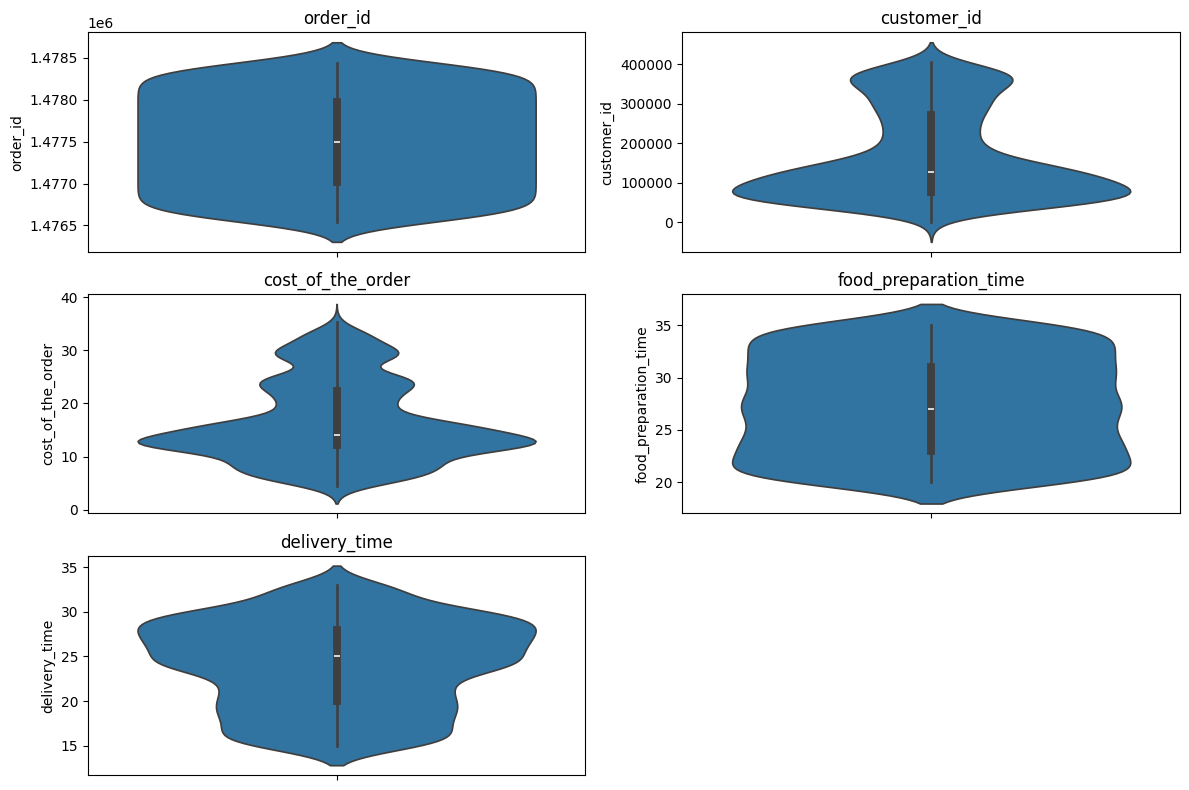

In [17]:
plt.figure(figsize = (12, 8))
for i in range(len(df_numeric.columns)):
  plt.subplot(3, 2, i+1)
  sns.violinplot(df_numeric[df_numeric.columns[i]])
  plt.title(df_numeric.columns[i])
  plt.tight_layout()
plt.show()

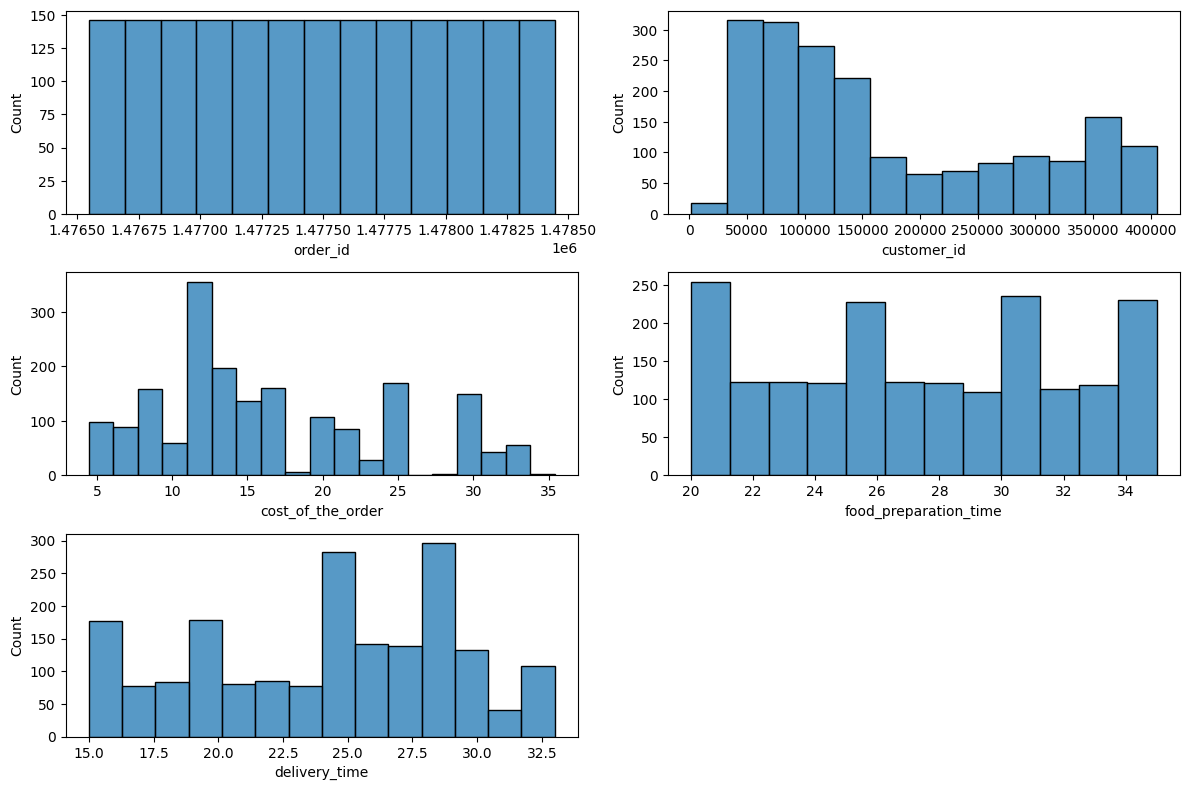

In [18]:
plt.figure(figsize = (12, 8))
for i in range(len(df_numeric.columns)):
  plt.subplot(3, 2, i+1)
  sns.histplot(df_numeric[df_numeric.columns[i]])
  plt.tight_layout()

Given three visualizations excluding order_id and customer_id columns as they do not provide any sensical insight:



*   The majority of orders fall between 10 to 20 range based on violinplot
*  Most orders take between 20 and 30 mins to prepare, overall showing a consistent distribution (based on violin one)


*   Most orders are delivered between 25 and 30 mins range with 27.5 mins being the most common delivery time.
*   There is a dense concentration of orders around 12$, signalling possible pricing strategy in the long term.





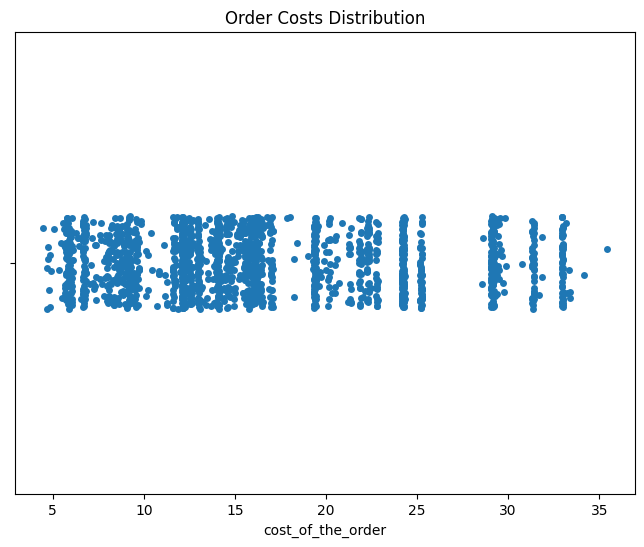

In [19]:
plt.figure(figsize = (8, 6))
sns.stripplot(x = 'cost_of_the_order', data=df)
plt.title('Order Costs Distribution')
plt.show()

In [20]:
np.sort(df['cost_of_the_order'].unique())

array([ 4.47,  4.66,  4.71,  4.75,  4.8 ,  4.85,  4.9 ,  5.05,  5.34,
        5.48,  5.53,  5.58,  5.63,  5.67,  5.68,  5.72,  5.73,  5.77,
        5.82,  5.87,  5.92,  5.97,  6.01,  6.02,  6.06,  6.07,  6.11,
        6.26,  6.4 ,  6.45,  6.55,  6.64,  6.69,  6.7 ,  6.74,  6.79,
        6.84,  7.03,  7.08,  7.18,  7.23,  7.28,  7.33,  7.38,  7.61,
        7.66,  7.67,  7.71,  7.81,  7.86,  7.91,  7.95,  7.96,  8.  ,
        8.01,  8.05,  8.1 ,  8.15,  8.2 ,  8.25,  8.3 ,  8.34,  8.35,
        8.39,  8.44,  8.49,  8.54,  8.59,  8.63,  8.68,  8.73,  8.78,
        8.83,  8.88,  8.92,  8.93,  8.97,  8.98,  9.02,  9.07,  9.12,
        9.17,  9.22,  9.26,  9.27,  9.31,  9.32,  9.41,  9.46,  9.51,
        9.55,  9.56,  9.6 ,  9.61,  9.65,  9.7 ,  9.75,  9.85, 10.14,
       10.24, 10.38, 10.43, 10.72, 10.82, 10.86, 11.11, 11.16, 11.3 ,
       11.59, 11.64, 11.69, 11.79, 11.83, 11.84, 11.88, 11.93, 11.98,
       12.08, 12.13, 12.17, 12.18, 12.22, 12.23, 12.27, 12.32, 12.37,
       12.42, 12.46,

Based on the last two outputs, thought of segmenting customers into 4 groups:
1. Low Cost: <=10
2. Medium Cost: 10 - 20 (including)
3. High Cost: 20 - 30 (including)
4. Avant - Garde : above 30

In [21]:
df.rename(columns = {'cost_of_the_order': 'order_cost'}, inplace = True)

df['cost_segment'] = df['order_cost'].apply(
    lambda x: 'Low' if x <= 10 else
              'Medium' if x <= 20 else
              'High' if x<= 30 else
              'Avant - Garde'

)
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,order_cost,day_of_the_week,rating,food_preparation_time,delivery_time,rating_status,cost_segment
991,1478301,184325,Asuka Sushi,Japanese,22.75,Weekday,5,25,32,Rated,High
360,1478067,237616,Shake Shack,American,12.13,Weekday,3,22,27,Rated,Medium
647,1477542,59673,Shake Shack,American,12.08,Weekday,Not given,27,27,Non-rated,Medium
1302,1477715,217363,Jack's Wife Freda,Mediterranean,9.41,Weekend,5,28,15,Rated,Low
1154,1476554,368663,Shake Shack,American,9.12,Weekend,Not given,31,19,Non-rated,Low


In [22]:
pvt = pd.pivot_table(df, index = 'cuisine_type', values = 'order_id', columns = 'cost_segment', aggfunc = 'count')
print(pvt)

cost_segment    Avant - Garde   High    Low  Medium
cuisine_type                                       
American                 30.0  141.0  122.0   291.0
Chinese                  13.0   49.0   48.0   105.0
French                    NaN    9.0    NaN     9.0
Indian                    4.0   19.0   17.0    33.0
Italian                  12.0   78.0   64.0   144.0
Japanese                 27.0   95.0   99.0   249.0
Korean                    1.0    1.0    3.0     8.0
Mediterranean             4.0    7.0   10.0    25.0
Mexican                   4.0   19.0   16.0    38.0
Middle Eastern            3.0   17.0   10.0    19.0
Southern                  1.0    6.0    1.0     9.0
Spanish                   NaN    5.0    NaN     7.0
Thai                      1.0    8.0    2.0     8.0
Vietnamese                NaN    1.0    2.0     4.0


In [23]:
dif = df.groupby('cost_segment').size()
dif.sort_values(ascending = False, inplace = True)
dif

cost_segment
Medium           949
High             455
Low              394
Avant - Garde    100
dtype: int64

'for index, value in enumerate(dif.values):\n  print(value + np.max(dif.values)* 0.006)'

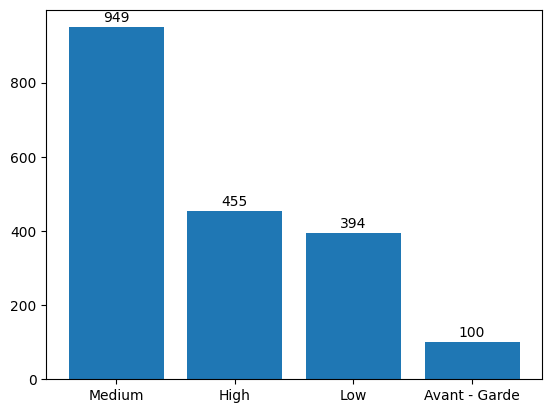

In [28]:
plt.bar(dif.index, dif.values)
for index, value in enumerate(dif.values):
    plt.text(index, value + np.max(dif.values) * 0.006,
             str(value), ha='center', va='bottom')

'''for index, value in enumerate(dif.values):
  print(value + np.max(dif.values)* 0.006)'''

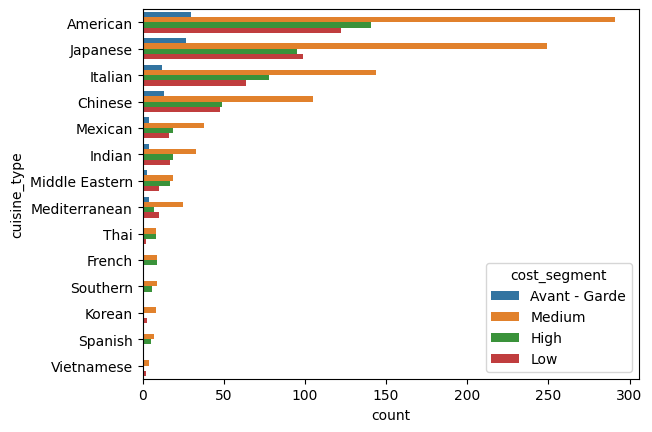

In [29]:
sns.countplot(df, y = 'cuisine_type', hue = 'cost_segment', order = order_cnt['cuisine_type'])
plt.show()

In [30]:
av_gard = df[df['cost_segment'].isin([ 'Avant - Garde', 'High'])]
rest = av_gard['restaurant_name'].value_counts().reset_index()
rest = rest[rest['count'] != 0]
rest

,restaurant_name,count
0,Shake Shack,65
1,The Meatball Shop,37
2,Blue Ribbon Fried Chicken,34
3,Blue Ribbon Sushi,28
4,Parm,20
...,...,...
110,V-Nam Cafe,1
111,Amma,1
112,Vanessa's Dumpling House,1
113,Philippe Chow,1


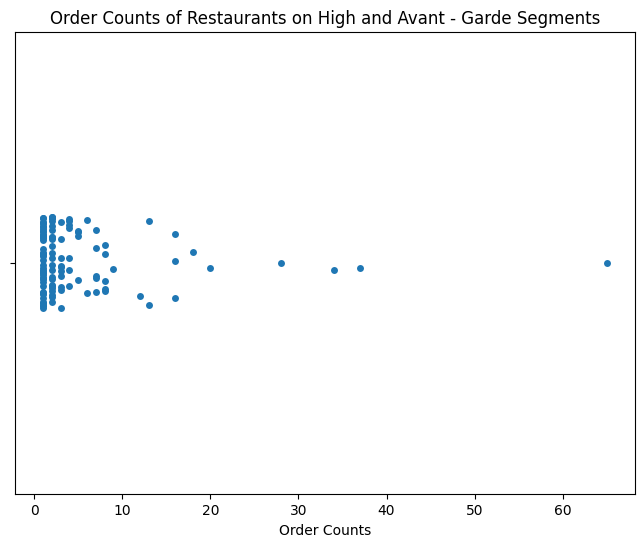

In [31]:
plt.figure(figsize = (8, 6))
sns.stripplot(x = 'count', data = rest)
plt.xlabel('Order Counts')
plt.title('Order Counts of Restaurants on High and Avant - Garde Segments')
plt.show()

In [32]:
med_rest = df[df['cost_segment'] == 'Medium']
med_restt = med_rest['restaurant_name'].value_counts().reset_index()
med_restt[med_restt['count'] > 5].head()

,restaurant_name,count
0,Shake Shack,108
1,Blue Ribbon Sushi,68
2,The Meatball Shop,67
3,Blue Ribbon Fried Chicken,45
4,Parm,34


With the last countplot:


*   American and Japanese cuisines have the highest number of "Avant-Garde" orders, indicating a noticeable segment willing to pay for expensive meals. So, the app owners may encourage partner restaurants to offer those premium options specifically for those cuisines if they target to keep their "Avant - Garde" market engaged.
*   The sphere for avant - garde meals in the cuisines below Chinese is almost dead with very few or no orders at all, no need to keep an eye there.


*   With a significant dominance of the medium cost segment across all types especially in the Mediterranean cuisine, additional items / appetizers such as drinks, desserts, or special low - price meals being inherent to the cuisine can be offered for customers while ordering meals in that range.
*   Considering medium range's adjacency to higher - priced meals, slightly expensive meals can be recommended to customers, thus empowering them to slide into the high cost segment.




In [33]:
cost_df = df.groupby('cost_segment')['order_cost'].sum().reset_index()
cost_df.sort_values(by = 'order_cost', ascending = False, inplace = True)
cost_df

,cost_segment,order_cost
3,Medium,13545.47
1,High,11519.56
0,Avant - Garde,3235.35
2,Low,3014.44


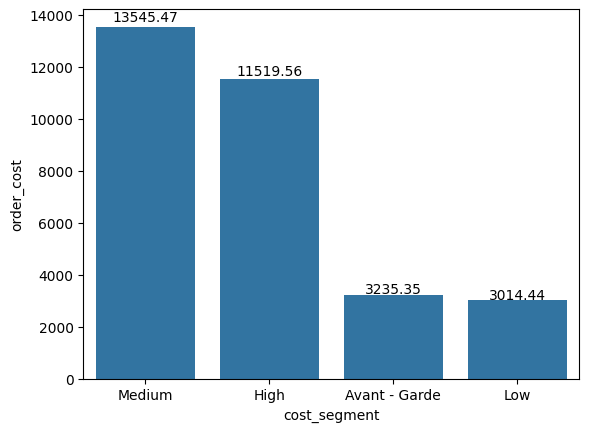

In [34]:
barplot = sns.barplot(x = 'cost_segment', y = 'order_cost', data=cost_df)

for index, value in enumerate(cost_df['order_cost']):
    barplot.text(index, value + value * 0.015, str(value), color='black', ha="center")

In [ ]:
cost_df['order_cost'] = cost_df['order_cost'] / cost_df['order_cost'].sum()
cost_df

,cost_segment,order_cost
3,Medium,0.432558
1,High,0.367863
0,Avant - Garde,0.103317
2,Low,0.096262


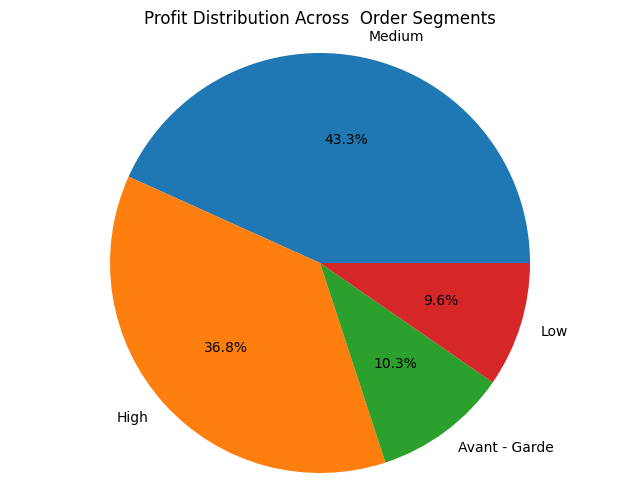

In [35]:
plt.figure(figsize = (8, 6))
plt.pie(cost_df['order_cost'], labels = cost_df['cost_segment'], autopct='%1.1f%%')
plt.title("Profit Distribution Across  Order Segments")
plt.axis('equal')
plt.show()

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders.

In [36]:
top_n = df['restaurant_name'].value_counts().head(5).reset_index()
top_n

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [43]:
top_50_restaurants = df['restaurant_name'].value_counts().head(20).index
top_50_restaurants_data = df[df['restaurant_name'].isin(top_50_restaurants)]
pivot_table = pd.pivot_table(top_50_restaurants_data,
                             values='order_id',
                             index='restaurant_name',
                             columns='cuisine_type',
                             aggfunc='count',
                             fill_value = 0)
print(pivot_table)

cuisine_type                   American  Chinese  Indian  Italian  Japanese  \
restaurant_name                                                               
Bareburger                           27        0       0        0         0   
Blue Ribbon Fried Chicken            96        0       0        0         0   
Blue Ribbon Sushi                     0        0       0        0       119   
Blue Ribbon Sushi Bar & Grill         0        0       0        0        44   
Blue Ribbon Sushi Izakaya             0        0       0        0        29   
Five Guys Burgers and Fries          29        0       0        0         0   
Han Dynasty                           0       46       0        0         0   
Jack's Wife Freda                     0        0       0        0         0   
Momoya                                0        0       0        0        30   
Nobu Next Door                        0        0       0        0        42   
Parm                                  0        0    

<Axes: xlabel='cuisine_type', ylabel='restaurant_name'>

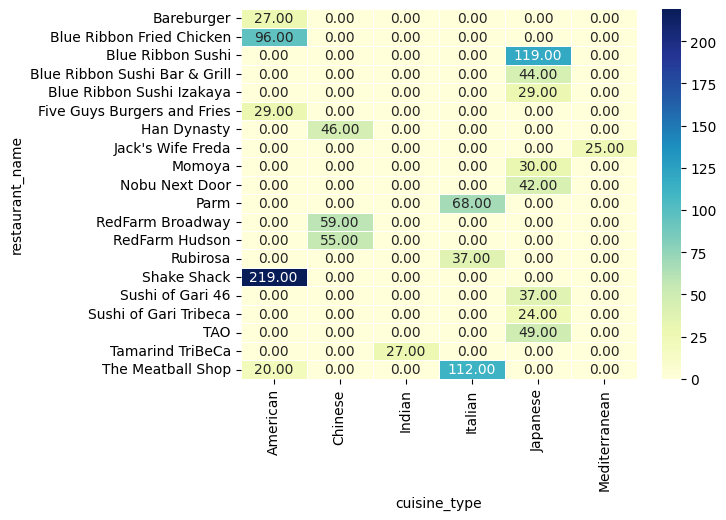

In [44]:
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

### Question 8: Write the code to find the most popular cuisine on weekends.

In [47]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1).reset_index()['cuisine_type']

0    American
Name: cuisine_type, dtype: object

In [48]:
pd.pivot_table(df, index = 'cuisine_type', values = 'order_id', columns = 'day_of_the_week', aggfunc = 'count')

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


In [49]:
pd.pivot_table(df, index = 'cost_segment', values = 'order_id', columns = 'day_of_the_week', aggfunc = 'count')

day_of_the_week,Weekday,Weekend
cost_segment,,
Avant - Garde,23,77
High,135,320
Low,120,274
Medium,269,680




*   Generally, there are relatively high order volumes on weekends compared to weekdays across all cost segments and cuisine types. So, to generate more revenue, especially from medium range meals (found from the earlier observations), special weekend menus with limited - time offers should be introduced on these days if they want to. On top of that, Yorkhub may consider to partner with other types of businesses, such as movie theaters, entertainment venues or even malls to combine restaurants' specialized meals with their loyalts bonuses to attrach a wider audience.

E.g I have some loyalty points by consistently buying orders from medium level cost range. Then, on weekend, I spend time on let's say a movie theatre which has partnership with Yorkhub, where using my loyalty bonuses I can get a certain amount of discount on ticket cost. For the record, not a win - win situation, win - win - win, as all the sides come out to be beneficial in the long run.



### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?

In [50]:
df.rename(columns = {'day_of_the_week': 'week_day'}, inplace = True)

df[df['order_cost'] > 20].shape[0] / df.shape[0] * 100

29.24130663856691

This question was probably asked to draw attention to cost range segmentation, which was done at the very beginning.

### Question 10: Write the code to find the mean delivery time based on this dataset.

In [51]:
df['delivery_time'].mean()

24.161749209694417

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details.

In [52]:
df[df['order_cost'] == df['order_cost'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,order_cost,week_day,rating,food_preparation_time,delivery_time,rating_status,cost_segment
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,Rated,Avant - Garde


## Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset.

<Axes: >

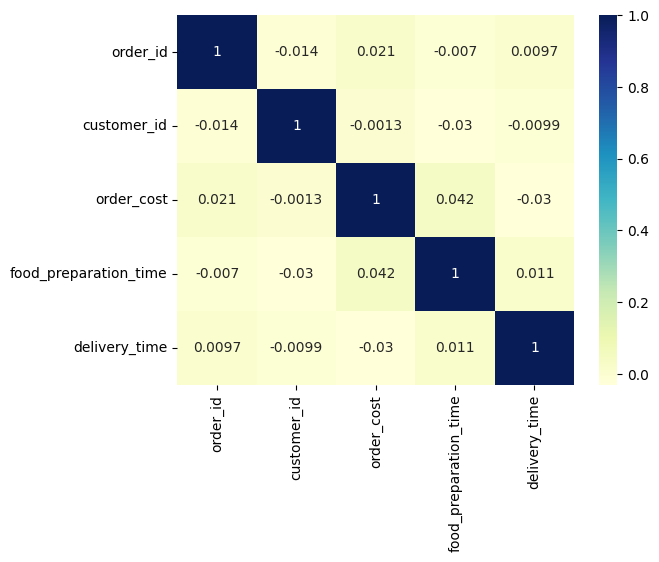

In [53]:
sns.heatmap(df.corr(numeric_only = True),cmap='YlGnBu',annot=True)

**Let's look at the relationship between cuisine type and cost of the order.**

<Axes: xlabel='cuisine_type', ylabel='order_cost'>

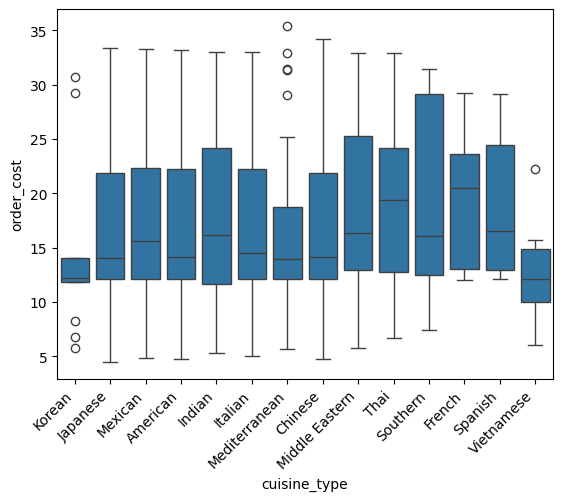

In [56]:
plt.xticks(rotation=45,ha='right')
sns.boxplot(data=df,x='cuisine_type',y='order_cost')

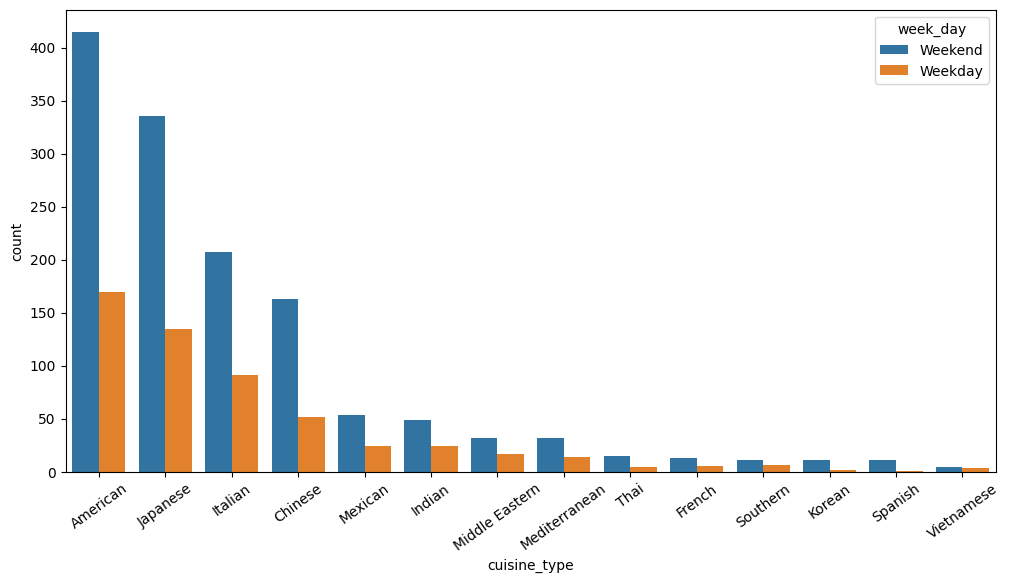

In [57]:
cuisine_order_cnt = df['cuisine_type'].value_counts()

plt.figure(figsize=(12, 6))
plt.xticks(rotation = 36)
sns.countplot(data=df, x='cuisine_type', hue='week_day', order=cuisine_order_cnt.index)
plt.show()

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer.

In [93]:
copied = df.copy()
copied['rating'] = copied['rating'].replace('Not given', np.nan)
copied['rating'] = copied['rating'].astype('float64')
copied.groupby('restaurant_name')['rating'].count()[(copied.groupby('restaurant_name')['rating'].count() > 50) & (copied.groupby('restaurant_name')['rating'].mean() > 4)].reset_index()['restaurant_name']
#copied.groupby('restaurant_name')['rating'].count()

0    Blue Ribbon Fried Chicken
1            Blue Ribbon Sushi
2                  Shake Shack
3            The Meatball Shop
Name: restaurant_name, dtype: object

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset.

In [60]:
# Sum of the order costs which is greater than 20 dollars
cost_20 = df[df['order_cost'] > 20]['order_cost'].sum()

# Sum of the order costs which is greater than 5 dollars
cost_5 = df[df['order_cost'] > 5]['order_cost'].sum()

# For orders whose cost is greater than 20 we take 25% of total cost and for orders(greater than 5 dollars) we take 15%, so taken money is deducted from total cost.
net_profit = df['order_cost'].sum() - (cost_20 * 0.25 + cost_5 * 0.15)
net_profit

22935.2805

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time.

Note: The total delivery time is the summation of the food preparation time and delivery time.

In [61]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
len(df[df['total_delivery_time'] > 60]) / len(df)

0.1053740779768177

In [62]:
df['delivery_time'].mean()

24.161749209694417

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results.

In [65]:
dff = df.copy()
weekend_time = dff[dff['week_day'] == 'Weekend']['total_delivery_time'].mean()
weekday_time = dff[dff['week_day'] == 'Weekday']['total_delivery_time'].mean()

print(f"Total delivery times for weekend and weekday are {weekend_time:.2f} and {weekday_time:.2f}, respectively")

Total delivery times for weekend and weekday are 49.91 and 55.55, respectively


## Conclusion and Recommendations

###Additional Scripts

In [67]:
data = pd.pivot_table(data=df,values='delivery_time',index='week_day',columns='cuisine_type',aggfunc='mean')
data

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
week_day,,,,,,,,,,,,,,
Weekday,28.248521,28.826923,27.200000,27.625000,28.802198,28.133333,26.0,28.785714,28.250000,28.470588,29.500000,28.0,26.500000,27.666667
Weekend,22.542169,22.269939,24.615385,22.346939,22.705314,22.519403,20.0,21.312500,22.641509,21.750000,20.727273,23.0,22.266667,25.000000


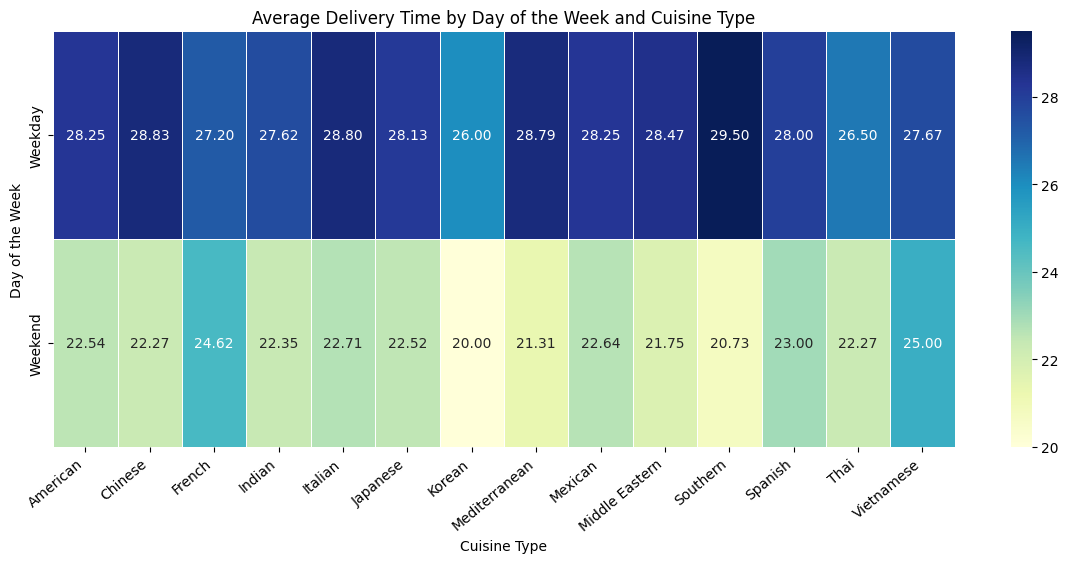

In [68]:
plt.figure(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Delivery Time by Day of the Week and Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.xticks(rotation=40,ha='right')
plt.show()

Delivery times are generally shorter on weekends compared to weekdays across almost all cuisine types.That's interesting because orders in weekends are more than weekdays (that shown in below with pie chart). Normally as the number of orders increases, the delivery time decreases.Actually this is good point.



*   On weekdays, Mediterranean cuisine has the shortest delivery time, with an average of 26.00 minutes.
On weekends, Mediterranean cuisine continues to have the shortest delivery time, with an average of 20.00 minutes.



*   There is a significant improvement in delivery times for Southern cuisine, which decreases from an average of 29.50 minutes on weekdays to 20.73 minutes on weekends. This indicates a noticeable reduction in delivery time by approximately 8.77 minutes on weekends.
*   Both French and Vietnamese cuisines exhibit relatively consistent delivery times between weekdays and weekends, showing only minor differences. This suggests that the delivery efficiency for these cuisines remains stable regardless of the day of the week.





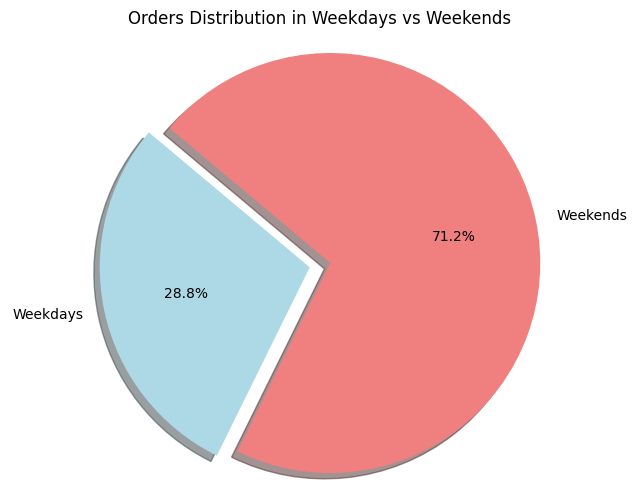

In [70]:
weekday_orders = df[df.week_day == 'Weekday'].shape[0]
weekend_orders = df[df.week_day == 'Weekend'].shape[0]

labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders, weekend_orders]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Weekdays)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Orders Distribution in Weekdays vs Weekends')
plt.show()

#referenced from https://www.kaggle.com/code/nelsonqs/eda-and-business-recommendation not ChatGPT produced script:)

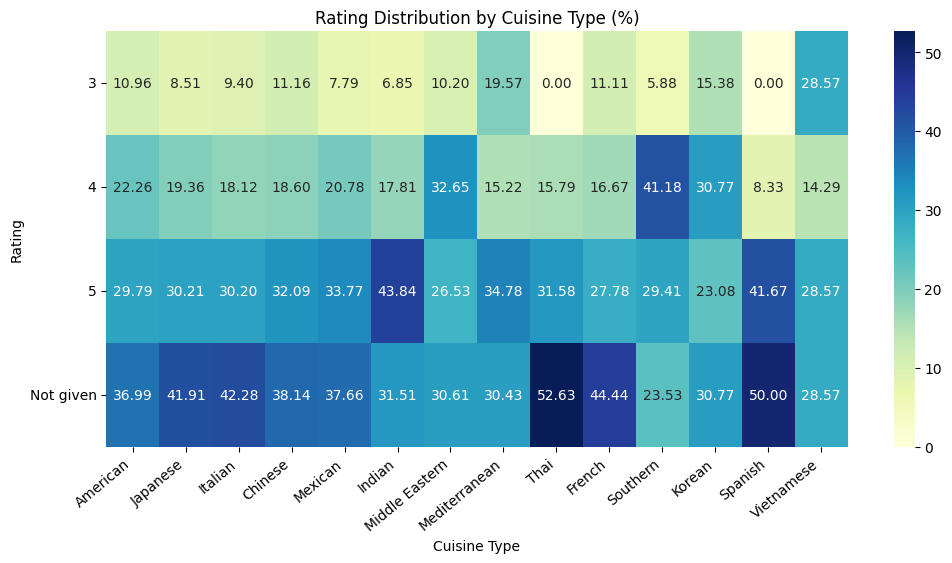

In [73]:
rating_data = pd.crosstab(columns=df['cuisine_type'],index=df['rating'])
rating_data_percentage = rating_data.div(rating_data.sum(axis=0), axis=1) * 100

total_orders = rating_data.sum(axis = 0)
sorted_cuis = total_orders.sort_values(ascending = False)
rating_data_percentage = rating_data_percentage[sorted_cuis.index]

plt.figure(figsize=(10, 6))
sns.heatmap(rating_data_percentage, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Rating Distribution by Cuisine Type (%)')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.xticks(rotation=40,ha='right')
plt.yticks(rotation = 0)
plt.show()

#referenced from https://seaborn.pydata.org/generated/seaborn.heatmap.html

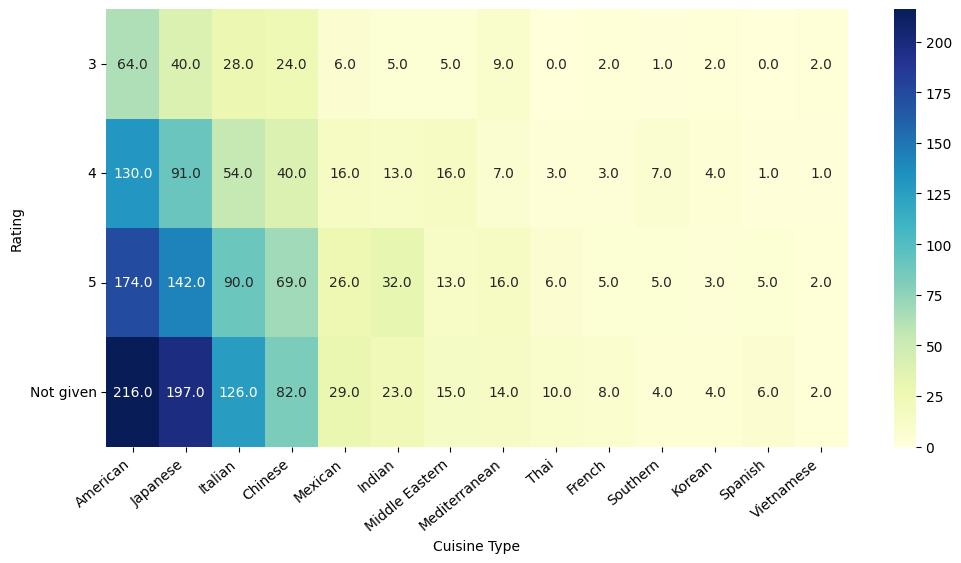

In [74]:
rating_data = rating_data[sorted_cuis.index]

plt.figure(figsize=(10, 6))
sns.heatmap(rating_data, annot=True, cmap="YlGnBu", fmt=".1f")

plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.xticks(rotation=40,ha='right')
plt.yticks(rotation = 0)
plt.show()

In [84]:
df_med = df[(df['cuisine_type'] == 'Mediterranean') & (df['rating']!= ' Not given')].restaurant_name
df_med_data = df[df['restaurant_name'].isin(df_med)]
pd.pivot_table(data = df_med_data, values = 'order_id', index = 'restaurant_name', columns = 'rating', aggfunc = 'count',
               fill_value = 0)

#print(df_med)

rating,3,4,5,Not given
restaurant_name,,,,
Barbounia,1,0,3,2
Jack's Wife Freda,5,3,11,6
Mamoun's Falafel,1,1,2,3
Olea,0,1,0,2
Pylos,2,2,0,1


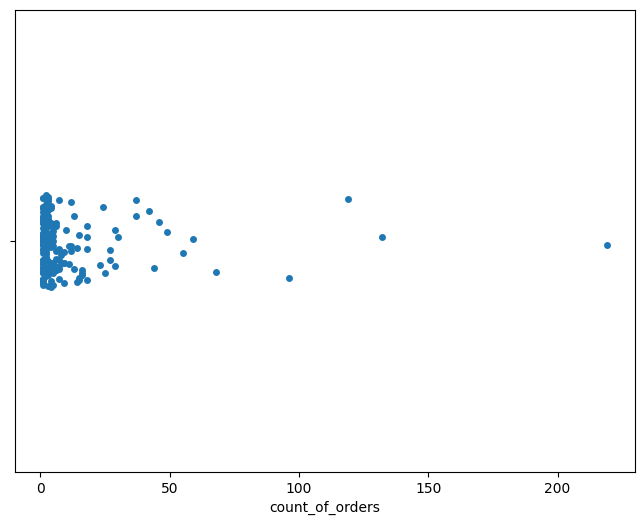

In [85]:
grouped_data = df.groupby('restaurant_name')['order_id'].agg('count').reset_index()
grouped_data = grouped_data.rename(columns={'order_id':'count_of_orders'})

plt.figure(figsize = (8, 6))
sns.stripplot(x = 'count_of_orders', data = grouped_data)
grouped_data['order_segments'] = grouped_data['count_of_orders'].apply(
    lambda x: 'Low' if x <= 5 else (
        'Medium' if x > 5 and x <= 50 else (
            'High' if x > 50 else 'Not any category'
        )
    )
)

#grouped_data.sort_values(by='count_of_orders')

#grouped_data[grouped_data['order_segments'] == 'Low']


In [86]:
df[df['rating']!= 'Not given']['rating'].astype('float64').mean()

4.344234079173838

In [87]:
grouped_data.groupby('order_segments')['restaurant_name'].count()

order_segments
High        7
Low       120
Medium     51
Name: restaurant_name, dtype: int64

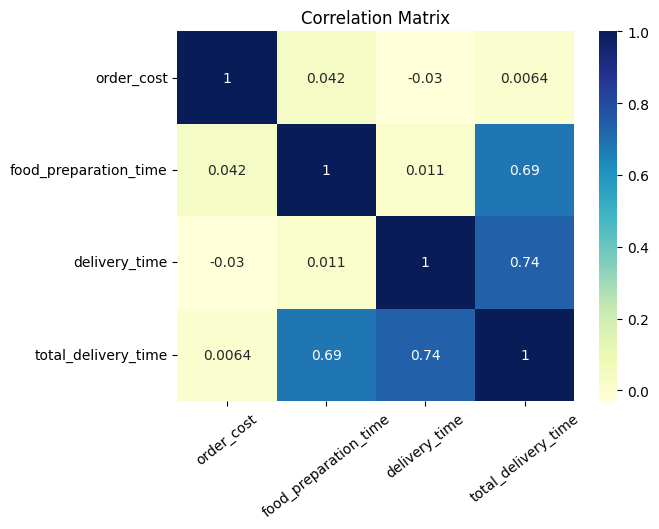

In [88]:
cls = ['order_cost', 'food_preparation_time', 'delivery_time', 'total_delivery_time']
df_new = df[cls]
sns.heatmap(df_new.corr(numeric_only = True),cmap='YlGnBu',annot=True)
plt.title('Correlation Matrix')
plt.xticks(rotation = 38)
plt.show()

Question 17: Write the conclusions and business recommendations derived from the analysis

All the necessary business objectives have already been given in the scripts above after the completion of guided questions.